In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [51]:
from tensorflow.examples.tutorials.mnist import input_data

In [52]:
nb_classes = 10
Width = 100
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])


with tf.name_scope('layer1') as scope:
    W1 = tf.Variable(tf.random_normal([784,Width]))
    b1 = tf.Variable(tf.random_normal([Width]))
    layer1 =  tf.sigmoid(tf.matmul(X,W1)+b1)
    
    W1_hist = tf.summary.histogram('weight1',W1)
    b1_hist = tf.summary.histogram('biases1',b1)
    layer1_hist = tf.summary.histogram('layer1',layer1)

with tf.name_scope('layer2') as scope:
    W2 = tf.Variable(tf.random_normal([Width,nb_classes]))
    b2 = tf.Variable(tf.random_normal([nb_classes]))
    hypothesis = tf.nn.softmax(tf.matmul(layer1,W2)+b2)
    #hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)
    W2_hist = tf.summary.histogram('weights2',W2)
    b2_hist = tf.summary.histogram('biases2',b2)
    hypothesis_hist = tf.summary.histogram('hypothesis',hypothesis)


In [53]:
with tf.name_scope('cost'):
    cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis = 1))
    tf.summary.scalar('cost',cost)

In [54]:
with tf.name_scope('optimizer'):
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [55]:
is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
tf.summary.scalar('accuracy',accuracy)

<tf.Tensor 'accuracy_2:0' shape=() dtype=string>

In [56]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [57]:
batch_xs,batch_ys = mnist.train.next_batch(100)

In [58]:
training_epochs= 15
batch_size = 100

Epoch: 0001 cost =  1.918705357
Epoch: 0002 cost =  0.799430994
Epoch: 0003 cost =  0.634101293
Epoch: 0004 cost =  0.552135289
Epoch: 0005 cost =  0.499057450
Epoch: 0006 cost =  0.461103631
Epoch: 0007 cost =  0.432837981
Epoch: 0008 cost =  0.410359213
Epoch: 0009 cost =  0.390389525
Epoch: 0010 cost =  0.375273580
Epoch: 0011 cost =  0.360470475
Epoch: 0012 cost =  0.348451865
Epoch: 0013 cost =  0.337459608
Epoch: 0014 cost =  0.327977075
Epoch: 0015 cost =  0.319184725
label: [4]
prediction: [9]


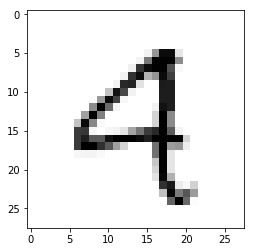

In [60]:
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter('logs/xor_logs_r0_01')
    writer.add_graph(sess.graph)
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer],feed_dict = {X:batch_xs,Y:batch_ys})
            #c,summary, _ = sess.run([cost,merged_summary,optimizer],feed_dict = {X:batch_xs,Y:batch_ys})
            avg_cost +=c/total_batch
           # writer.add_summary(summary,global_step = i)
            
        print('Epoch:', '%04d' %(epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
        
    r = random.randint(0,mnist.test.num_examples -1)
    print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print('prediction:', sess.run(tf.argmax(hypothesis,1),feed_dict = {X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap = 'Greys', interpolation = 'nearest')
    plt.show()